<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Mikio_Harman_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


# MERGING THE DATA

In [11]:
df = pd.merge(pd.merge(income, lifespan), population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
df = pd.merge(df, entities[['country', 'name', 'world_6region']],
              left_on='geo', right_on='country')

In [13]:
df.shape

(40437, 8)

In [14]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [15]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [16]:
df=df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
    'life_expectancy_years':'lifespan',
    'population_total':'population',
    'name':'country',
    'world_6region':'region'
})

df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
import seaborn as sns

(187, 6)

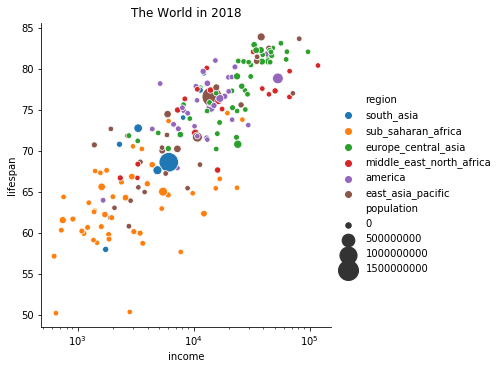

In [20]:
now = df[df.year == 2016]
now.sort_values('income', ascending=False)
sns.relplot(x='income', y='lifespan', size='population', data=now, hue='region', sizes=(30, 400))
plt.xscale('log')
plt.title('The World in 2018')
now.shape

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO